In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv('bigmart_train.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [8]:
train['Outlet_Age'] = 2018-train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [9]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [11]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
train['Outlet_Size'].mode()[0]

'Medium'

In [13]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [14]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

<AxesSubplot:>

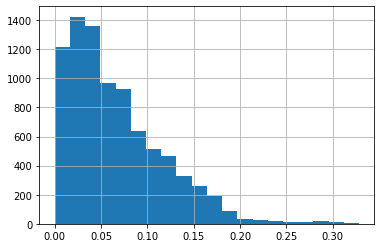

In [15]:
train['Item_Visibility'].hist(bins=20)

In [16]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1

filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5 *@IQR)')

In [17]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9


In [18]:
filt_train.shape

(8379, 13)

In [19]:
train.shape

(8523, 13)

In [20]:
train = filt_train
train.shape

(8379, 13)

In [21]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                       labels=['low viz', 'viz', 'high viz'])

In [22]:
train['Item_Visibility_bins'].value_counts()

low viz     4403
viz         2557
high viz     893
Name: Item_Visibility_bins, dtype: int64

In [23]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan, 'low viz',regex=True)

In [24]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(
    ['low fat', 'LF'],'low fat')

In [32]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(
    'reg','Regular')

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,low viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,low viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,low viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,low viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,low viz


In [36]:
le = LabelEncoder()

In [37]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'regular'], dtype=object)

In [38]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [39]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [40]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [41]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [42]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [43]:
train = pd.concat([train,dummy], axis=1)

In [44]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [45]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
                    'Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [46]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [47]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,1,0,1,0,0


In [48]:
x = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

In [49]:
test = pd.read_csv('bigmart_test.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [50]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'],
                                      [0.000,0.065,0.13,0.2],labels=['low viz', 'viz', 'high viz'])

In [58]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan, 'low viz',regex=True)

In [59]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [60]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('low viz')
test['Item_Visibility_bins'].head()

0    low viz
1    low viz
2        viz
3    low viz
4        viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [low viz < viz < high viz]

In [61]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(
    ['low fat', 'LF'],'low fat')

In [62]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(
    'reg','Regular')

In [63]:
le = LabelEncoder()

In [65]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [66]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [67]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [68]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [69]:
test['Outlet_Age'] = le.fit_transform(test['Outlet_Establishment_Year'])

In [70]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test,dummy],axis=1)

In [71]:
x_test = test.drop(['Item_Identifier', 'Item_Type','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [72]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
       'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [73]:
x_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Visibility_bins', 'Outlet_Age', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [74]:
from sklearn import model_selection
xtrain, xtest, ytrain,ytest=model_selection.train_test_split(
    x,y,test_size=0.3, random_state=42)

In [75]:
lin = LinearRegression()

In [76]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [77]:
lin.coef_

array([    3.25966105,    -8.96404263,  -176.50541841,    15.96779714,
          16.2626308 ,     7.63747167,    -2.30724914,    17.4861261 ,
       -1754.48883976,   219.19458541,  -122.1979641 ,  1657.49221845])

In [78]:
lin.intercept_

-178.4440635050123

In [79]:
predictions = lin.predict(xtest)

In [80]:
sqrt(mean_squared_error(ytest,predictions))

1119.1902345614074

In [81]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.001, normalize=True)
ridgereg.fit(xtrain,ytrain)

Ridge(alpha=0.001, normalize=True)

In [82]:
sqrt(mean_squared_error(ytrain,ridgereg.predict(xtrain)))

1139.5881785195563

In [83]:
sqrt(mean_squared_error(ytest,ridgereg.predict(xtest)))

1119.1330296254848

In [84]:
print("R2 value/cof of det: {}".format(ridgereg.score(xtest,ytest)))

R2 value/cof of det: 0.5480350824055293


In [85]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=0.001,normalize=True)
lassoreg.fit(xtrain,ytrain)

Lasso(alpha=0.001, normalize=True)

In [86]:
sqrt(mean_squared_error(ytrain,lassoreg.predict(xtrain)))

1139.5875160284804

In [87]:
sqrt(mean_squared_error(ytest,lassoreg.predict(xtest)))

1119.177618188778

In [88]:
print("R2 value/cof of det: {}".format(lassoreg.score(xtest,ytest)))

R2 value/cof of det: 0.5479990672629877


In [89]:
from sklearn.linear_model import ElasticNet

Elas = ElasticNet(alpha=0.001,normalize=True)
Elas.fit(xtrain,ytrain)

ElasticNet(alpha=0.001, normalize=True)

In [90]:
sqrt(mean_squared_error(ytrain,Elas.predict(xtrain)))

1478.0241580472282

In [91]:
sqrt(mean_squared_error(ytest,Elas.predict(xtest)))

1429.3821706247465

In [92]:
print("R2 value/cof of det: {}".format(Elas.score(xtest,ytest)))

R2 value/cof of det: 0.262710549981265
